Generating tasks of random sizes within a fixed range

In [1]:
import random

min_task_size = 100  # Minimum task size
max_task_size = 1000  # Maximum task size
num_tasks = 50  # Number of tasks to generate

task_sizes = [random.uniform(min_task_size, max_task_size) for _ in range(num_tasks)]
print(task_sizes)


[460.42697042099815, 775.9796568401762, 180.56277416146852, 978.0057906139139, 297.97365599903503, 821.2357940982365, 471.78937505273547, 814.5395682740302, 147.95292462565723, 218.08255187106715, 701.3050459022245, 441.8433607003012, 830.9781269460548, 231.66980891586007, 991.051953211374, 618.5029251451133, 296.9256129641401, 963.6677224529598, 445.7362438523048, 593.3416856764215, 640.2056067868322, 685.0122530701259, 180.0375823397344, 601.340293033446, 782.7851865141489, 444.9773418694564, 501.77621665111366, 457.44534670077866, 952.8164003449576, 219.44933317247018, 886.349768490372, 738.2001548698875, 577.7705129647368, 737.3746951061752, 322.6213482421981, 125.13057619611439, 320.1650998571488, 464.2965952007243, 480.6925761066652, 767.8786117808322, 834.044877273718, 102.78462527286254, 688.1847371376498, 311.2865282608643, 170.30230994194883, 728.9158137026907, 714.0055350946325, 695.9460375691609, 782.5560892773882, 598.7098713009304]


Defining parameters

In [2]:
edge_capacity = 40 #capacity of edge server in bytes
fog_capacity = 60 #capacity of fog server in bytes
cloud_coeff=0.01 # 1/bytes processed per second in cloud
fog_coeff=0.05 # 1/bytes processed per second in fog
edge_coeff=0.1 # 1/bytes processed per second in edge
edge_to_fog_link = 2 # datarte of the link ( Bytes/sec)
fog_to_cloud_link = 0.5 # datarte of the link ( Bytes/sec)

Function Definition of total task offloading time

In [3]:
def calculate_completion_time(task_size):
    edge_task = min(task_size, edge_capacity)
    task_size -= edge_task
    edge_to_fog_latency=task_size/edge_to_fog_link

    fog_task = 0
    if task_size > 0:
        fog_task = min(task_size, fog_capacity)
        task_size -= fog_task

    cloud_task = 0
    if task_size > 0:
        cloud_task = task_size

    total_latency = edge_to_fog_latency + cloud_task/fog_to_cloud_link
    completion_time = edge_task*edge_coeff + fog_task*fog_coeff + cloud_task*cloud_coeff + total_latency
    return completion_time

Calculating total task offloading time

In [4]:
task_completion_times = [calculate_completion_time(task_size) for task_size in task_sizes]

# Print or analyze task completion times as needed
print(task_completion_times)

[941.6716957567054, 1733.7089386688422, 239.21256314528597, 2240.7945344409236, 533.913876557578, 1847.3018431865737, 970.191331382366, 1830.4943163678158, 157.36184081039966, 333.38720519637855, 1546.2756652145833, 895.0268353577561, 1871.7550986345973, 367.4912203788088, 2273.5404025605485, 1338.4423421142344, 531.2832885399916, 2204.805983356929, 904.7979720692852, 1275.2876310478182, 1392.9160730349486, 1505.3807552060161, 237.89433167273333, 1295.3641355139493, 1750.7908181505136, 902.8931280923355, 1045.4583037942953, 934.1878202189544, 2177.5691648658435, 336.81782626290016, 2010.7379189108335, 1638.8823887234173, 1236.2039875414891, 1636.8104847164998, 595.7795840879172, 100.07774625224712, 589.6144006414435, 951.384453953818, 992.5383660277296, 1713.375315569889, 1879.4526419570323, 43.989409434884976, 1513.343690215501, 567.3291859347694, 213.45879795429155, 1615.5786923937537, 1578.1538930875274, 1532.824554298594, 1750.2157840862444, 1288.7617769653355]


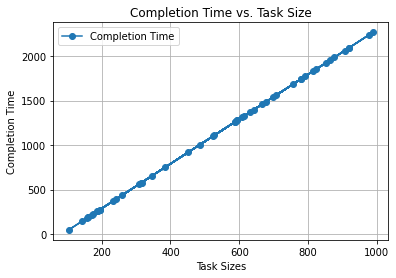

In [7]:
import matplotlib.pyplot as plt
plt.plot(task_sizes, task_completion_times, marker='o', linestyle='-')

# Add labels and a title
plt.xlabel('Task Sizes')
plt.ylabel('Completion Time')
plt.title('Completion Time vs. Task Size')

# Customize the plot by adding grid lines
plt.grid(True)

# Show a legend (optional)
plt.legend(['Completion Time'])

# Display the plot
plt.show()